# SVM

**SVM (Support Vector Machine)** je algoritam za klasifikaciju i regresiju koji pokušava da razdvoji podatke najboljom mogućom granicom.

Zamisli da imaš dve klase tačaka.<br>
SVM traži liniju (ili ravan, ili hiper-ravan) koja:

 - razdvaja klase<br>
 - ima najveći mogući razmak (marginu) do najbližih tačaka obe klase

Te najbliže tačke zovu se support vectors — po njima je algoritam dobio ime.

In [1]:
!mamba install scikit-learn

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, scikit-learn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.7557000000029803 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ brotli-python                 1.2.0                         py313h33caa6c_0               emscripten-forge              
+ certifi                       2026.1.4                      pyhd8ed1ab_0                  conda-forge                   
+ charset-normalizer            3.4.4                         pyhd8ed1ab_0                  conda-forge                   
+ idna                          3.11                          pyhd8ed1ab_0                  conda-forge                   
+ joblib                        1.5.3        

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [8]:
X.shape

(569, 30)

In [9]:
y.shape

(569,)

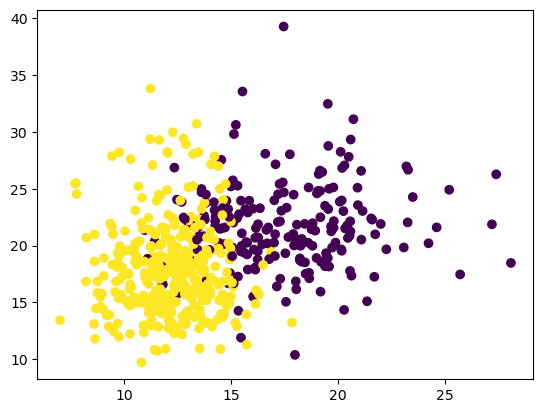

In [20]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
X_train.shape

(426, 30)

In [110]:
X_test.shape

(143, 30)

In [111]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

In [112]:
model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [113]:
y_test_pred = model.predict(X_test)

In [114]:
accuracy_score(y_test, y_test_pred)

0.965034965034965

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
model.support_

array([ 39,  40,  44,  80,  87,  98, 103, 163, 177, 213, 219, 225, 253,
       262, 314, 324,   2,  10,  15,  62,  86,  94, 121, 212, 224, 231,
       237, 245, 326, 404, 413, 416, 418])

In [117]:
# model.support_vectors_

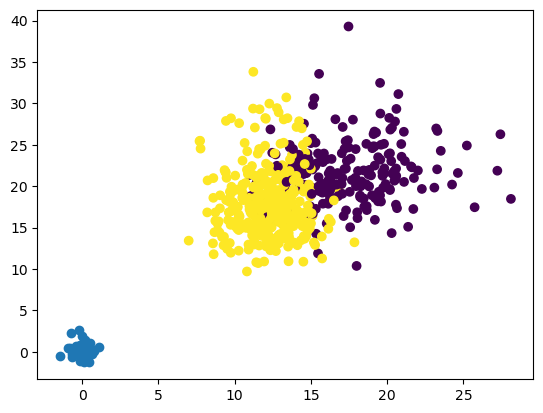

In [118]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1])